## Unit 5 : Eigenvalues, Eigenvectors and Diagonalization

### Definition

Let T be a linear operator on $ \mathcal{R}_n $.  
A nonzero vector v in $ \mathcal{R}_n $ is call an **eigenvector** of T if T(v) is a multiple of v,  
that is, **T(v) = &lambda; v** for some scalar &lambda;.  
The scalar &lambda; is called the **eigenvalue** of T that corresponds to v.

Let A be an n &times; n matrix.  
A nonzero vector v in $ \mathcal{R}_n $ is call an **eigenvector** of A if **A v = &lambda; v** for some scalar &lambda;.  
The scalar &lambda; is called the **eigenvalue** of A that corresponds to v.

> An eigenvector of A corresponds to a unique eigenvalue.

> An eigenvalue of A has infinitely many eigenvectors.

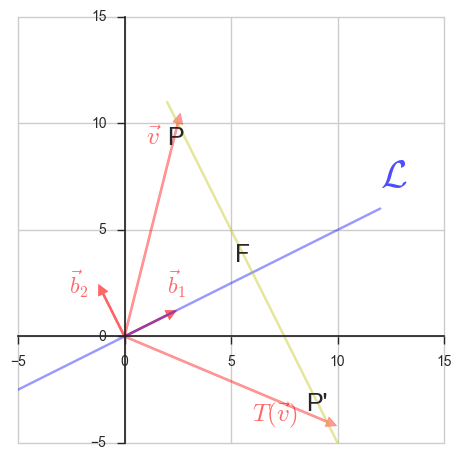

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn
seaborn.set(style='ticks')

x = np.linspace(0.2,10,100)
fig, ax = plt.subplots()

plt.xlim(-5, 15)
plt.ylim(-5, 15)
ax.set_aspect('equal')
ax.grid(True, which='both')
seaborn.despine(ax=ax, offset=0) # the important part here
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

plt.plot([-6,12], [-3,6], alpha=0.4, color='B')
plt.plot([15,2], [-15,11], alpha=0.4, color='Y')
ax.add_patch(patches.FancyArrow(0,0,  9.5, -4, width=0.1, color='R', head_width=0.5, head_length=0.5, alpha=0.4))
ax.add_patch(patches.FancyArrow(0,0,2.5, 10, width=0.1, color='R', head_width=0.5, head_length=0.5, alpha=0.4))
ax.add_patch(patches.FancyArrow(0,0,2, 1, width=0.1, color='R', head_width=0.5, head_length=0.5, alpha=0.6))
ax.add_patch(patches.FancyArrow(0,0,-1, 2, width=0.1, color='R', head_width=0.5, head_length=0.5, alpha=0.6))
plt.text(12,7, r"$ \mathcal{L} $", fontsize=28, color='B', alpha=0.7)
plt.text(2,9, r"P", fontsize=18)
plt.text(8.5,-3.5, r"P'", fontsize=18)
plt.text(1,9, r"$ \vec{v} $", fontsize=18, color='R', alpha=0.6)
plt.text(6,-4, r"$ T(\vec{v}) $", fontsize=18, color='R', alpha=0.6)
plt.text(2,2, r"$ \vec{b}_1 $", fontsize=16, color='R', alpha=0.6)
plt.text(-2.6,2, r"$ \vec{b}_2 $", fontsize=16, color='R', alpha=0.6)
plt.text(5.2,3.5, r"F", fontsize=18);

### Example

reflection operator T about the line $ y = \frac{1}{2} x $

$ b_1 = \begin{bmatrix} 2 \\ 1 \end{bmatrix} $ is an eigenvector of T corresponding to the eigenvalue 1.

$ b_2 = \begin{bmatrix} -1 \\ 2 \end{bmatrix} $ is an eigenvector of T corresponding to the eigenvalue -1.

A = $ \begin{bmatrix} 0.6 & 0.8 \\ 0.8 & -0.6 \end{bmatrix} $

以下哪些是 eigenvector, 如果是，其 eigenvalue 為何?

$ [-5, 5]^T, \ \ [7, 6]^T, \ \ [2, 1]^T, \ \ [-1, 2]^T $

In [3]:
import numpy as np
from scipy import linalg
A = np.array([[ 0.6, 0.8],
              [ 0.8,-0.6]])
v1 = [-5, 5]
v2 = [ 7, 6]
v3 = [ 2, 1]
v4 = [-1, 2]
Av1 = A.dot(v1)
Av2 = A.dot(v2)
Av3 = A.dot(v3)
Av4 = A.dot(v4)

print('\nA x %8s = %-10s' % (v1, Av1))
print('A x %8s = %-10s' % (v2, Av2))
print('A x %8s = %-10s  -> YES 1' % (v3, Av3))
print('A x %8s = %-10s  -> YES -1\n' % (v4, Av4))


A x  [-5, 5] = [ 1. -7.] 
A x   [7, 6] = [ 9.  2.] 
A x   [2, 1] = [ 2.  1.]   -> YES 1
A x  [-1, 2] = [ 1. -2.]   -> YES -1



### Property

The eigenvectors and corresponding eigenvalues of a linear operator are the same as those of its standard matrix.

$ T(\vec{v}) = A \vec{v}, \ \ T(\vec{v}) = \lambda \vec{v} $

### Property

Let A be an n &times; n matrix with eigenvalue &lambda;.  
The eigenvectors of A corresponding to &lambda; are the nonzero solutions of $ (A - \lambda I_n) \vec{v} = \vec{0} $

### Definition

For $ A \in R^{n \times n} $, if &lambda; is an eigenvalue of A,  
then the null space of $ A - \lambda I_n $ is called the **eigenspace** of A corresponding to eigenvalue &lambda;

If &lambda; is an eigenvalue of a linear operator T on $ R^n $,  
then the set of vectors v in $ R^n $ such that T(v) = &lambda; v is called the  **eigenspace** of T corresponding to eigenvalue &lambda;.


### Example

Check if 3 is an eigenvalue of B and find a basis for the corresponding eigenspace, where

$ B = \begin{bmatrix} 3&0&0 \\ 0&1&2 \\ 0&2&1 \end{bmatrix} $


find the RREF of B - 3I = $ \begin{bmatrix} 0&1&-1 \\ 0&0&0 \\ 0&0&0 \end{bmatrix} $

$ \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} $ = $ \begin{bmatrix} x_1 \\ x_3 \\ x_3 \end{bmatrix} $ =
$ x_1 \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} $ + $ x_3 \begin{bmatrix} 0 \\ 1 \\ 1 \end{bmatrix} $

Thus $ \left\{ \begin{bmatrix} 1\\0\\0 \end{bmatrix} , \begin{bmatrix} 0\\1\\1 \end{bmatrix} \right\} $ is the basis of the eigenspace of B corresponding to the eigenvalue 3.

### Example

Some square matrices and linear operators on $ R^n $ have no real eigenvalues, like the 90-degree-rotation matrix $ \begin{bmatrix} 0&-1 \\ 1&0 \end{bmatrix} $

### Summary

$ T(\vec{x}) = A \vec{x} = \lambda \vec{x} $

The set of all eig. vectors corr. to &lambda; is:

$ \{ \vec{x} \in \mathcal{R}^n : ( A - \lambda I_n ) \ \vec{x} = \vec{0} \} \backslash \{ \vec{0} \} $ 